# Popular Data Science Questions
The goal of this project is to use data from [Stack Exchange](https://datascience.stackexchange.com/) to find popular topics that would be good for a data science educational course.  

##### What kind of questions are welcome on the site?
On the [help site](https://datascience.stackexchange.com/help/asking) we learned that a good question is:  
* On topic
* Specific
* Relevant to others

##### What, other than questions, does the site's home subdivide into?
The site's [home](https://datascience.stackexchange.com/) includes four other sections:  
* Tags
* Users
* Jobs
* Unanswered

Tags will help us in this analysis because we can use the tags as topics and quantify how many questions are asked about each subject.

##### What information is available in each post?
* Score
* Title
* Author
* Body
* How recent it was active
* Number of views
* Tags
* Related questions


# Exploring the Data

Using Stack Exchange's database explorer [tool](https://data.stackexchange.com/datascience/query/new), we can determine that the Posts table will be useful for our analysis because it contains view count, answer count, and tags.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Parse dates esures that Creation Date is correctly imported as datetime type.

In [2]:
df = pd.read_csv("2019_questions.csv", parse_dates=["CreationDate"])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


We see that only FavoriteCount has missing values. A missing value on this column probably means that the question was is not present in any users' favorite list, so we can replace the missing values with zero.

The types seem adequate for every column, however, after looking at the unique values in FavoriteCount, there is no reason to store the values as floats.

In [4]:
df["FavoriteCount"].unique()

array([nan,  1.,  2.,  3.,  0., 11.,  4.,  5.,  7.,  6., 16.,  8.])

In [5]:
# fill null values with zero
df = df.fillna(0)

In [6]:
# change data type to integer
df["FavoriteCount"] = df["FavoriteCount"].astype(int)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    8839 non-null int64
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 483.5+ KB


In [8]:
df.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,0
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,0
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,0
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,0
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,0


We can also make tags easier to work with by converting them to a comma separated list.

In [9]:
df["Tags"] = df["Tags"].str.replace("><", ",").str.replace("[<>]", "")

In [10]:
df.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,"machine-learning,data-mining",0,0
1,44420,2019-01-23 09:34:01,0,25,"machine-learning,regression,linear-regression,...",0,0
2,44423,2019-01-23 09:58:41,2,1651,"python,time-series,forecast,forecasting",0,0
3,44427,2019-01-23 10:57:09,0,55,"machine-learning,scikit-learn,pca",1,0
4,44428,2019-01-23 11:02:15,0,19,"dataset,bigdata,data,speech-to-text",0,0


# Most Used and Most Viewed
First we will count how often each tag is used.

In [11]:
tag_count = dict()
for tags in df["Tags"]:
    for tag in tags.split(","):
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1
tag_count

{'.net': 1,
 '3d-object-detection': 1,
 '3d-reconstruction': 9,
 'ab-test': 6,
 'accuracy': 89,
 'activation': 1,
 'activation-function': 44,
 'active-learning': 4,
 'activity-recognition': 5,
 'actor-critic': 21,
 'adaboost': 1,
 'aggregation': 12,
 'ai': 25,
 'alex-net': 5,
 'algorithms': 68,
 'allennlp': 2,
 'amazon-ml': 1,
 'anaconda': 20,
 'ann': 2,
 'annotation': 12,
 'anomaly': 4,
 'anomaly-detection': 92,
 'anonymization': 3,
 'anova': 2,
 'apache-hadoop': 13,
 'apache-nifi': 1,
 'apache-spark': 35,
 'arima': 11,
 'association-rules': 19,
 'attention-mechanism': 26,
 'auc': 3,
 'audio-recognition': 25,
 'autoencoder': 106,
 'automatic-summarization': 10,
 'automation': 4,
 'automl': 2,
 'aws': 20,
 'aws-lambda': 2,
 'azure-ml': 12,
 'backpropagation': 65,
 'batch-normalization': 29,
 'bayes-error': 1,
 'bayesian': 40,
 'bayesian-networks': 12,
 'bayesian-nonparametric': 2,
 'beginner': 27,
 'bert': 64,
 'bias': 19,
 'bigdata': 95,
 'binary': 26,
 'bioinformatics': 4,
 'books': 

For improved aesthetics, we will convert the dictionary to a dataframe and rename the column something meaningful.

In [12]:
tag_count = pd.DataFrame.from_dict(tag_count, orient='index')
tag_count.rename(columns={0: 'Count'}, inplace=True)
tag_count

,Count
.net,1
wikipedia,1
lasso,8
gensim,36
descriptive-statistics,21
unseen-data,1
openai-gpt,2
nlg,9
bigdata,95
sequential-pattern-mining,17


Sort dataframe by count and save the top 20 as most_used.

In [13]:
most_used = tag_count.sort_values("Count").tail(20)
most_used

,Count
machine-learning-model,224
statistics,234
clustering,257
predictive-modeling,265
r,268
dataset,340
regression,347
pandas,354
lstm,402
time-series,466



The threshold of 20 is somewhat arbitrary and we can experiment with others, however, popularity of the tags rapidly declines, so looking at these tags should be enough to help us with our goal. Let's visualize these data.

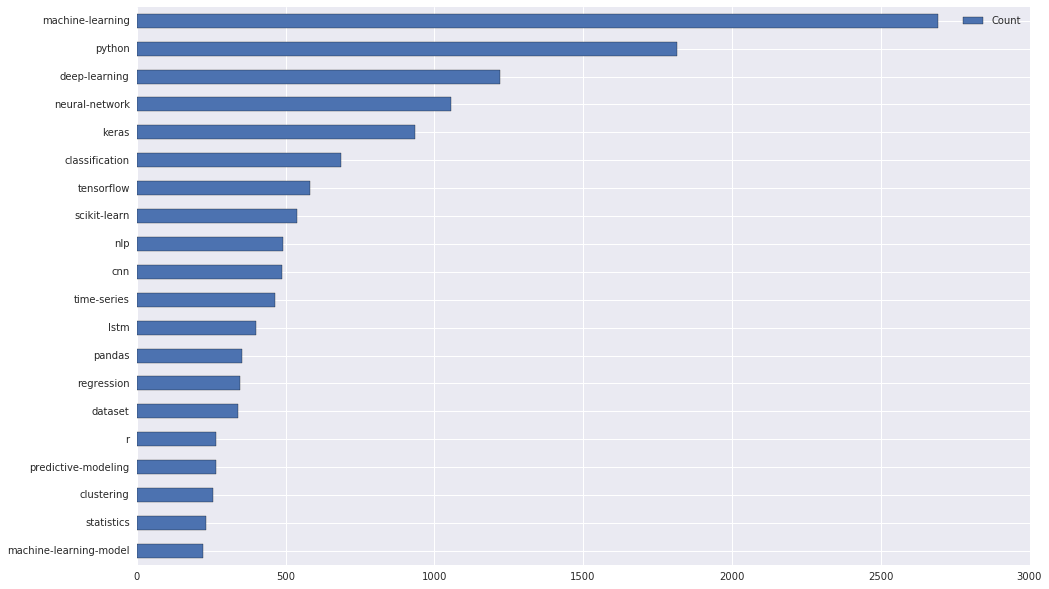

In [14]:
most_used.plot(kind="barh", figsize=(16,10))

Then we will repeat the same process to see how often each tag is viewed.

In [15]:
tag_view_count = dict()

for index, row in df.iterrows():
    for tag in row["Tags"].split(","):
        if tag in tag_view_count:
            tag_view_count[tag] += row['ViewCount']
        else:
            tag_view_count[tag] = row['ViewCount']

tag_view_count

{'.net': 438,
 '3d-object-detection': 7,
 '3d-reconstruction': 1129,
 'ab-test': 153,
 'accuracy': 15233,
 'activation': 15,
 'activation-function': 13121,
 'active-learning': 155,
 'activity-recognition': 126,
 'actor-critic': 1014,
 'adaboost': 23,
 'aggregation': 828,
 'ai': 3432,
 'alex-net': 208,
 'algorithms': 4581,
 'allennlp': 183,
 'amazon-ml': 35,
 'anaconda': 10476,
 'ann': 74,
 'annotation': 1043,
 'anomaly': 352,
 'anomaly-detection': 10992,
 'anonymization': 381,
 'anova': 70,
 'apache-hadoop': 466,
 'apache-nifi': 119,
 'apache-spark': 4598,
 'arima': 1004,
 'association-rules': 1022,
 'attention-mechanism': 15165,
 'auc': 67,
 'audio-recognition': 2195,
 'autoencoder': 15676,
 'automatic-summarization': 581,
 'automation': 142,
 'automl': 85,
 'aws': 1939,
 'aws-lambda': 992,
 'azure-ml': 694,
 'backpropagation': 9958,
 'batch-normalization': 4913,
 'bayes-error': 128,
 'bayesian': 3171,
 'bayesian-networks': 786,
 'bayesian-nonparametric': 29,
 'beginner': 2281,
 'bert

In [16]:
tag_view_count = pd.DataFrame.from_dict(tag_view_count, orient='index')
tag_view_count.rename(columns={0:"Count"}, inplace=True)
tag_view_count

,Count
.net,438
wikipedia,23
lasso,347
gensim,6928
descriptive-statistics,2665
unseen-data,35
openai-gpt,147
nlg,599
bigdata,12918
sequential-pattern-mining,524


In [17]:
most_viewed = tag_view_count.sort_values("Count").tail(20)
most_viewed

,Count
clustering,33928
csv,38654
pytorch,40240
dataset,43151
regression,49451
numpy,49767
time-series,64134
cnn,70349
nlp,71382
lstm,74458


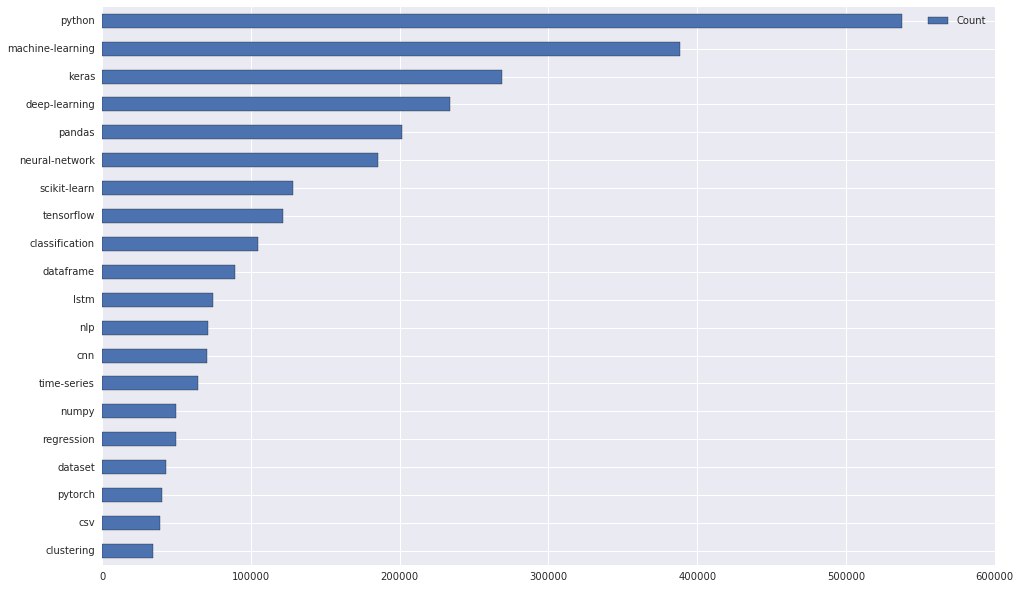

In [18]:
most_viewed.plot(kind="barh", figsize=(16,10))

Let's view them side by side.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1d0f9e86d8>],
      dtype=object)

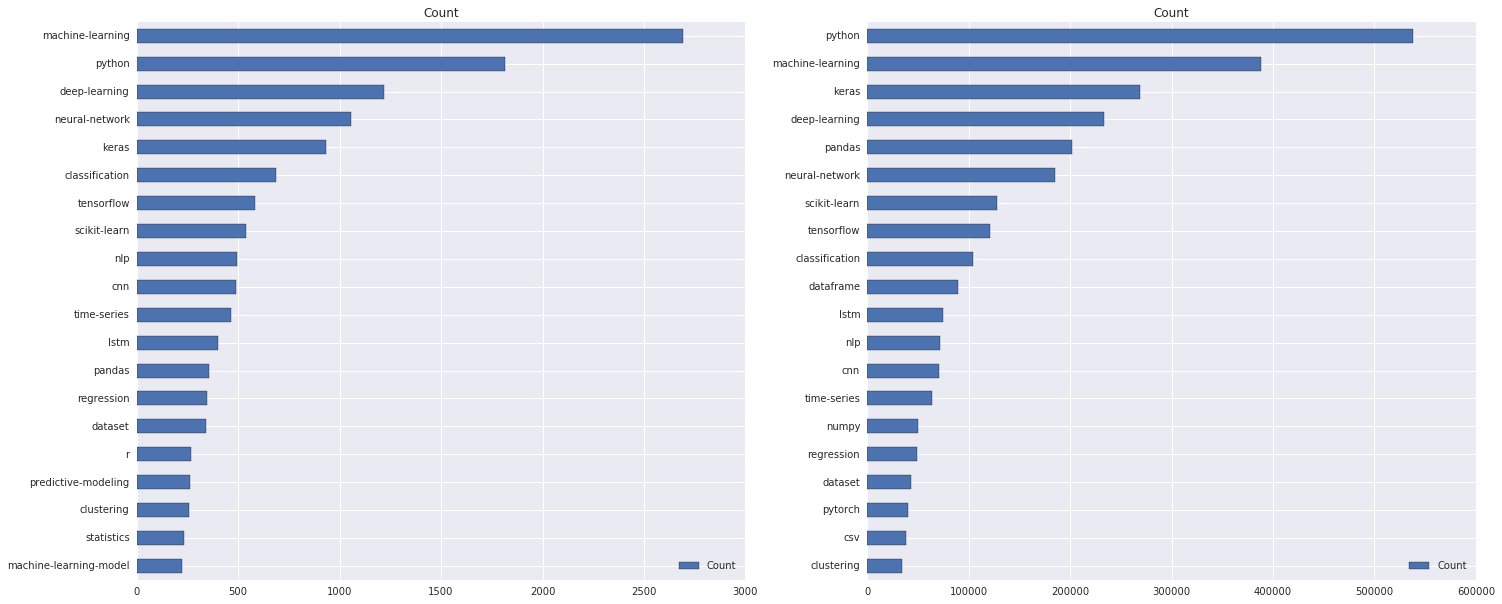

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches((24, 10))
most_used.plot(kind="barh", ax=axes[0], subplots=True)
most_viewed.plot(kind="barh", ax=axes[1], subplots=True)

# Relations Between Tags
One way to look at relationships between tags is to create a dataframe that counts each time tags appear together.  
We will look at most used tags s

In [20]:
# create list of tags
all_tags = list(tag_count.index)
all_tags

['.net',
 'wikipedia',
 'lasso',
 'gensim',
 'descriptive-statistics',
 'unseen-data',
 'openai-gpt',
 'nlg',
 'bigdata',
 'sequential-pattern-mining',
 'tokenization',
 'nl2sql',
 'pyspark',
 'normalization',
 'rdkit',
 'experiments',
 'ensemble',
 'proximal-svm',
 'summarunner-architecture',
 'matplotlib',
 'bioinformatics',
 'anaconda',
 'text-mining',
 'unbalanced-classes',
 'efficiency',
 'epochs',
 'search',
 'julia',
 'forecast',
 'web-scrapping',
 'wolfram-language',
 'machine-learning',
 'adaboost',
 'structured-data',
 'dimensionality-reduction',
 'one-hot-encoding',
 'data.table',
 'tesseract',
 'speech-to-text',
 'grid-search',
 'neural-network',
 'missing-data',
 'label-smoothing',
 'supervised-learning',
 'meta-learning',
 'apache-hadoop',
 'regularization',
 'feature-map',
 'exploitation',
 'estimators',
 'kernel',
 'scraping',
 'numerical',
 'pac-learning',
 'categorical-data',
 'vae',
 'sampling',
 'search-engine',
 'inceptionresnetv2',
 'one-shot-learning',
 'math',
 

In [21]:
# create dataframe with tags as columns and rows
associations = pd.DataFrame(index=all_tags,columns=all_tags)

In [22]:
# fill null vlaues with zero
associations.fillna(0, inplace=True)
associations

,.net,wikipedia,lasso,gensim,descriptive-statistics,unseen-data,openai-gpt,nlg,bigdata,sequential-pattern-mining,...,kaggle,siamese,multivariate-distribution,rmsle,dialog-flow,categories,gru,mse,pickle,self-study
.net,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
wikipedia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
lasso,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
gensim,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
descriptive-statistics,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
unseen-data,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
openai-gpt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
nlg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bigdata,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sequential-pattern-mining,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


For each list of tags in df["Tags"], we will increment the intervening tags by one. The end result will be a dataframe that for each pair of tags, it tells us how many times they were used together.

In [23]:
for tags in df["Tags"]:
    tag_list = tags.split(",")
    associations.loc[tag_list, tag_list] += 1
associations

,.net,wikipedia,lasso,gensim,descriptive-statistics,unseen-data,openai-gpt,nlg,bigdata,sequential-pattern-mining,...,kaggle,siamese,multivariate-distribution,rmsle,dialog-flow,categories,gru,mse,pickle,self-study
.net,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
wikipedia,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
lasso,0,0,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
gensim,0,0,0,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
descriptive-statistics,0,0,0,0,21,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
unseen-data,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
openai-gpt,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
nlg,0,0,0,0,0,0,0,9,0,0,...,0,0,0,0,0,0,0,0,0,0
bigdata,0,0,0,0,0,0,0,0,95,1,...,0,0,0,0,0,0,0,0,0,1
sequential-pattern-mining,0,0,0,0,0,0,0,0,1,17,...,0,0,0,0,0,0,0,0,0,0


Filter by most used to get a more targeted set of data.

In [24]:
relations_most_used = associations.loc[most_used.index,most_used.index]
relations_most_used

,machine-learning-model,statistics,clustering,predictive-modeling,r,dataset,regression,pandas,lstm,time-series,cnn,nlp,scikit-learn,tensorflow,classification,keras,neural-network,deep-learning,python,machine-learning
machine-learning-model,224,3,3,21,7,12,8,4,5,7,4,4,18,9,21,17,10,19,37,139
statistics,3,234,3,16,16,17,16,3,1,22,1,3,6,0,19,3,11,12,35,89
clustering,3,3,257,0,16,5,2,5,3,20,0,9,24,0,12,0,8,2,45,61
predictive-modeling,21,16,0,265,13,7,28,4,13,31,6,1,12,6,27,11,13,32,35,123
r,7,16,16,13,268,6,10,2,3,22,2,4,1,1,10,10,9,5,24,63
dataset,12,17,5,7,6,340,6,14,7,6,11,11,9,9,28,13,20,32,53,99
regression,8,16,2,28,10,6,347,6,11,24,6,2,37,9,34,31,42,21,59,119
pandas,4,3,5,4,2,14,6,354,7,19,1,3,37,3,3,3,1,1,244,62
lstm,5,1,3,13,3,7,11,7,402,87,24,19,2,43,20,133,69,103,61,71
time-series,7,22,20,31,22,6,24,19,87,466,8,0,12,9,25,51,33,44,105,131


To make the relations easier for a human to read, create a heat map.  
First get rid of values where tags match each other.

In [25]:
# get rid of values that represent tag and the same tag
for i in range(relations_most_used.shape[0]):
    relations_most_used.iloc[i,i] = pd.np.NaN

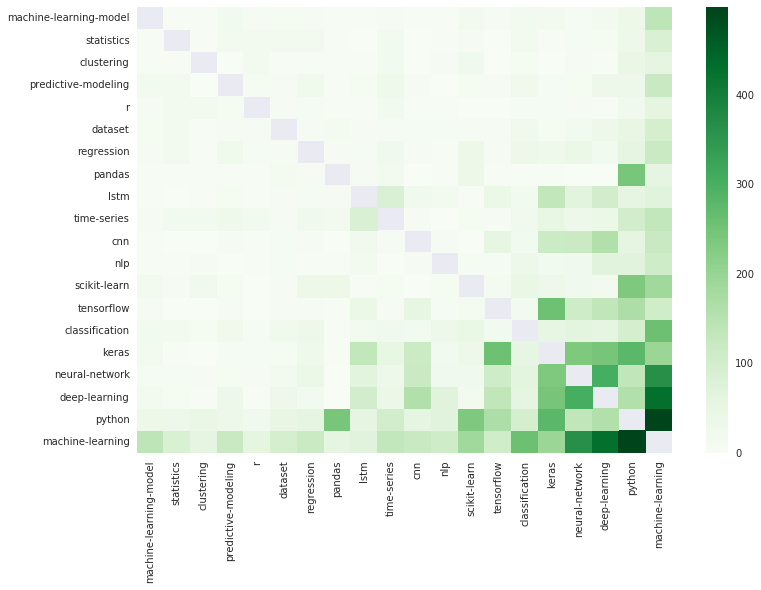

In [26]:
plt.figure(figsize=(12,8))
sns.heatmap(relations_most_used, cmap="Greens", annot=False)

With this visualization, it is much easier to see that some of the most related tags are machine-learning and python, machine-learning and deep-learning, and machine-learning and neural-network. Since the most used tags also have the stongest relationship, it is possible that they end up getting used together more often without actually having a strong relationship between them.

# Enter Domain Knowledge
[Keras](https://keras.io/), [scikit-learn](https://scikit-learn.org/stable/), [TensorFlow](https://www.tensorflow.org/) are all Python libraries that allow their users to employ deep learning (a type of neural network).

Most of the top tags are all intimately related with one central machine learning theme: deep learning. If we want to be very specific, we can suggest the creation of Python content that uses deep learning for classification problems (and other variations of this suggestion).

At the glance of an eye, someone with sufficient domain knowledge can tell that the most popular topic at the moment, as shown by our analysis, is deep learning.

# Is the deep-learning trend just a fad?
To answer this question we will look at how many deep-learning questions have been asked over time.  
Let's read in the file into a dataframe and parse the dates at read-time.

In [27]:
all_q = pd.read_csv("all_questions.csv", parse_dates=["CreationDate"])

In [28]:
all_q.head()

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,<python><keras><tensorflow><cnn><probability>
1,45418,2019-02-12 00:50:39,<neural-network>
2,45422,2019-02-12 04:40:51,<python><ibm-watson><chatbot>
3,45426,2019-02-12 04:51:49,<keras>
4,45427,2019-02-12 05:08:24,<r><predictive-modeling><machine-learning-mode...


For the time period we will use quarter.

In [29]:
# create function the returns quarter
def get_quarter(d):
    year = str(d.year)
    quarter = str(((d.month-1) // 3) + 1)
    return "{0}Q{1}".format(year, quarter)

# apply the function to a new field
all_q["Quarter"] = all_q["CreationDate"].apply(get_quarter)

In [30]:
# create function to count if deep-learning is contained within tag
def dl(row):
    if "deep-learning" in row["Tags"]:
        return 1
    else:
        return 0
    
# apply the function
all_q["deep_learning"] = all_q.apply(dl, axis=1)

In [31]:
all_q.sort_values("deep_learning", ascending=False).head()

,Id,CreationDate,Tags,Quarter,deep_learning
21575,36985,2018-08-15 17:01:29,<python><deep-learning><tensorflow>,2018Q3,1
3512,16272,2017-01-12 07:53:26,<deep-learning><convnet><image-classification>,2017Q1,1
8928,49360,2019-04-16 00:32:17,<deep-learning><reinforcement-learning>,2019Q2,1
13822,52383,2019-05-22 09:15:58,<machine-learning><neural-network><deep-learning>,2019Q2,1
8925,49355,2019-04-15 22:24:14,<machine-learning><neural-network><deep-learni...,2019Q2,1


In [32]:
# group by quarter and get total number of deep learning questions and total questions
quarterly = all_q.groupby("Quarter").agg({"deep_learning": ["sum", "size"]})

In [33]:
# rename columns
quarterly.columns = ['DeepLearningQuestions', 'TotalQuestions']
# calculate rate of deep learning questions
quarterly["DeepLearningRate"] = quarterly["DeepLearningQuestions"]\
                                /quarterly["TotalQuestions"]
# sort index (Quarter) in chronological order
quarterly.reset_index(inplace=True)
quarterly

,Quarter,DeepLearningQuestions,TotalQuestions,DeepLearningRate
0,2014Q2,1,157,0.006369
1,2014Q3,1,189,0.005291
2,2014Q4,6,216,0.027778
3,2015Q1,3,190,0.015789
4,2015Q2,7,284,0.024648
5,2015Q3,8,311,0.025723
6,2015Q4,12,382,0.031414
7,2016Q1,27,516,0.052326
8,2016Q2,36,518,0.069498
9,2016Q3,47,585,0.080342


Visualize the data

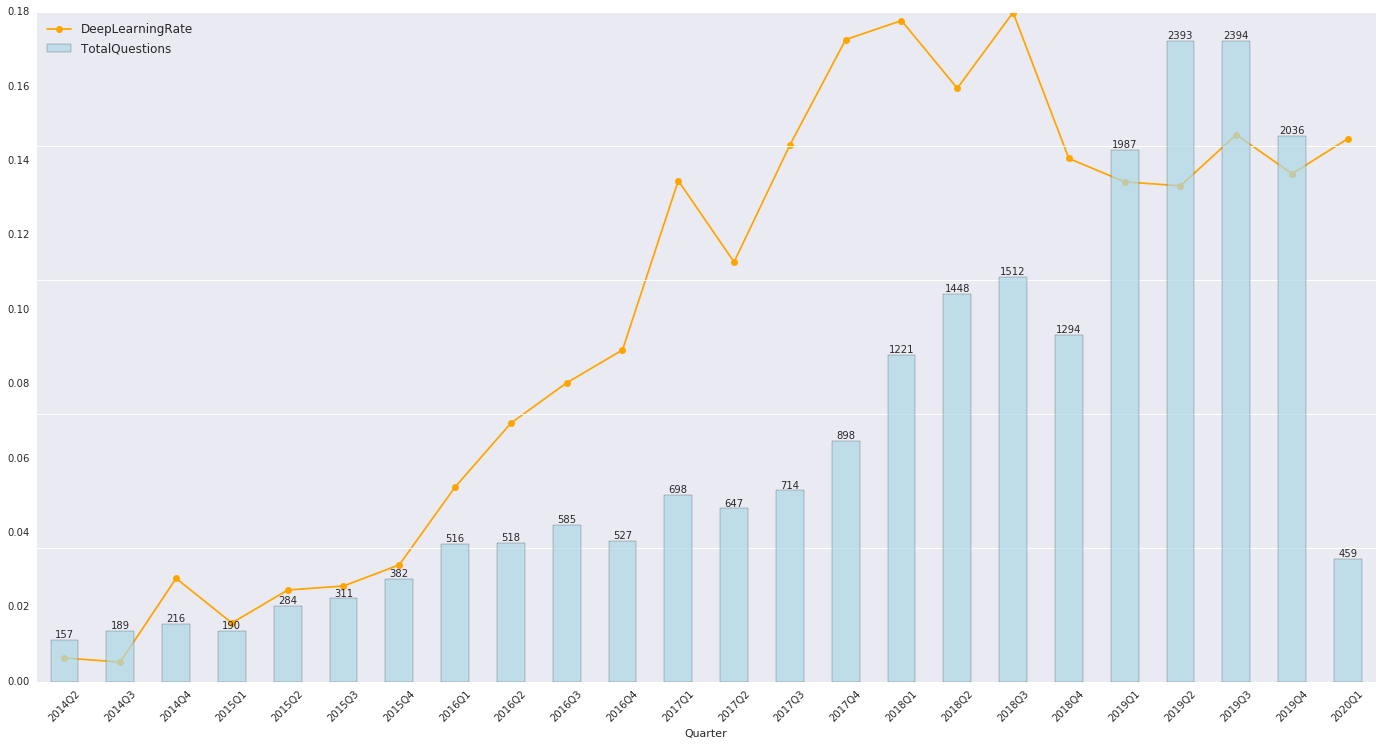

In [34]:
ax1 = quarterly.plot(x="Quarter", y="DeepLearningRate", kind="line",
                    linestyle="-", marker="o", color="orange", figsize=(24,12)
                    )

ax2 = quarterly.plot(x="Quarter", y="TotalQuestions", kind="bar", ax=ax1, 
                    secondary_y=True, alpha=0.7, rot=45, color="lightblue")

for idx, t in quarterly["TotalQuestions"].iteritems():
    ax2.text(idx, t, str(t), ha="center", va="bottom")
    
xlim = ax1.get_xlim()

ax1.get_legend().remove()

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles=handles1 + handles2, 
          labels = labels1 + labels2,
          loc="upper left", prop={"size":12})

for ax in (ax1, ax2):
    for where in ("top", "right"):
        ax.spines[where].set_visible(False)
        ax.tick_params(right=False, labelright=False)

It seems that deep learning questions was a high-growth trend since the start of DSSE and it looks like it is plateauing. There is no evidence to suggest that interest in deep learning is decreasing and so we maintain our previous idea of proposing that we create deep learning content.